## Load data

In [11]:
import numpy as np
from random import random

def loadDigitData():
    from sklearn.datasets import load_digits

    data = load_digits()
    inputs = data.images
    outputs = data['target']
    outputNames = data['target_names']
     
    # shuffle the original data
    noData = len(inputs)
    permutation = np.random.permutation(noData)
    inputs = inputs[permutation]
    outputs = outputs[permutation]
    
    inputsResult = []
    for i in range(0,len(inputs)):
        inputRow = []
        for x in range(0,len(inputs[0])):
            sum = 0
            for y in range(0,len(inputs[0][0])):
                sum += inputs[i][x][y]
            mean = sum / len(inputs[0][0])
            inputRow.append(mean)
        inputsResult.append(inputRow)     
    return inputsResult, outputs, outputNames

inputs, outputs, outputNames = loadDigitData()
print(inputs)



[[[ 0.  2. 16. ... 14.  5.  0.]
  [ 0.  9. 16. ...  8.  3.  0.]
  [ 0.  9. 16. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  4.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  4. 16. ...  0.  0.  0.]]

 [[ 0.  0. 13. ...  0.  0.  0.]
  [ 0.  7. 16. ... 13.  0.  0.]
  [ 0.  8. 13. ... 16.  4.  0.]
  ...
  [ 0.  0.  0. ...  5. 16.  0.]
  [ 0.  1.  7. ...  9. 15.  1.]
  [ 0.  1. 13. ... 16.  6.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0.  4. ...  0.  0.  0.]
  [ 0.  0.  4. ...  0.  0.  0.]
  ...
  [ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 16. ...  9. 16.  5.]
  [ 0.  0.  3. ... 15.  7.  1.]]

 ...

 [[ 0.  0.  3. ...  0.  0.  0.]
  [ 0.  0. 10. ...  0.  0.  0.]
  [ 0.  2. 15. ...  0.  0.  0.]
  ...
  [ 0.  3. 16. ...  4. 12.  0.]
  [ 0.  0. 14. ... 11. 11.  0.]
  [ 0.  0.  3. ...  8.  0.  0.]]

 [[ 0.  0.  7. ...  1.  0.  0.]
  [ 0.  7. 15. ...  7.  0.  0.]
  [ 0.  5. 15. ...  8.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  2. ...  4.  4.  0.]
  [ 0.  0.  6. ... 13. 16.  

### plot data on classes 

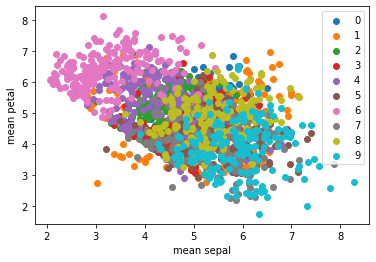

In [2]:


import matplotlib.pyplot as plt
labels = set(outputs)
labelsNames = []
noData = len(inputs)

for label in labels:
    x=[]
    y=[]
    for dt in range(len(inputs)):
        if outputs[dt] == label:
            x.append((inputs[dt][0]+inputs[dt][1]+inputs[dt][2]+inputs[dt][3])/4)
            y.append((inputs[dt][4]+inputs[dt][5]+inputs[dt][6]+inputs[dt][7])/4)
    plt.scatter(x, y, label = label)

plt.xlabel('mean sepal')
plt.ylabel('mean petal')
plt.legend()
plt.show()


### separating training data from test data 20%-80%

In [3]:
import numpy as np 
import math

np.random.seed(5)

# generate the positions of the data that will be a part of the test data
noTestDataIndexes = math.floor( 0.2 * len(inputs))
testDataIndexes = []
for index in range(0,noTestDataIndexes):
    testDataIndexes.append(np.random.randint(0,len(inputs)))

inputTest = []
outputTest = []
inputTraining = []
outputTraining = []
for i in range (0,len(inputs)):
    if i in testDataIndexes :
        inputTest.append(inputs[i])
        outputTest.append(outputs[i])
    else:
        inputTraining.append(inputs[i])
        outputTraining.append(outputs[i])

**normalize data**

In [4]:
from sklearn.preprocessing import StandardScaler

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData


normalizedTrainInput, normalizedTestInput = normalisation(inputTraining,inputTest)
print(normalizedTrainInput)
print(normalizedTestInput)

[[-1.29911473  0.18302283 -0.70918961 ... -0.52182068  0.34712919
   0.57881058]
 [-0.62071845  0.42494322 -0.45353932 ... -0.92530447  0.13856695
   1.49439018]
 [ 0.05767783  0.90878401  0.56906184 ...  0.8231253  -0.27855753
   0.57881058]
 ...
 [ 0.35918729 -1.83298047 -1.646574   ... -1.12704637 -1.04328575
  -0.14057339]
 [-0.84685054 -1.26849955 -0.0274555  ...  0.8231253  -0.76520276
  -0.59836319]
 [-0.54534109  0.66686362  0.90992889 ...  0.28514691  1.04233666
   0.51341204]]
[[ 1.79135722  1.55390507 -1.39092371 ... -0.45457338  0.83377442
  -0.27137047]
 [-0.69609581  0.74750375 -0.19788903 ... -0.32007878  0.62521218
  -0.20597193]
 [-0.69609581 -1.02657915 -1.22049019 ...  0.755878    1.11185741
   0.84040475]
 ...
 [ 2.09286668 -1.26849955  0.05776126 ... -0.79080987 -0.13951604
  -0.53296464]
 [ 1.79135722  0.58622349 -1.47614047 ...  0.35239421 -0.20903679
   0.51341204]
 [ 0.88682885  0.82814388 -0.79440637 ... -0.72356257 -0.76520276
   0.38261496]]


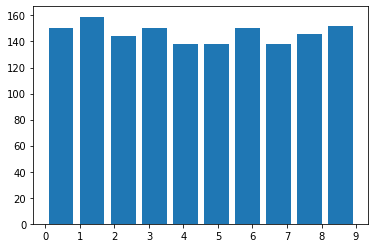

In [5]:
plt.hist(outputTraining, rwidth = 0.8)
plt.xticks(np.arange(len(outputNames)), outputNames)
plt.show()


    **ANN Classification (logic)**

In [6]:
class Neuron:
    def __init__(self,w=[],out=None,delta=0.0):
        self.weights = w
        self.output = out
        self.delta = delta
    
def initialisation(inputNumberNeurons,outputNumberNeurons,hiddenNeuronsNumber):
    networkStruct = []
    hiddenLayer = []
    # construct the hidden layer  
    for neuron in range(0,hiddenNeuronsNumber):
        # each neuron starts with random weights 
        neuronWeights = []
        for weight in range(0,inputNumberNeurons+1):
            neuronWeights.append(random())
        neuronToAdd = Neuron(neuronWeights)
        # add each neuron to the hidden layer
        hiddenLayer.append(neuronToAdd)
    # add the hidden layer to the structure of the network
    networkStruct.append(hiddenLayer)
    
    outputLayer = []        
    # construct the output layer
    for neuron in range(0,outputNumberNeurons):
        # each neuron starts with random weights 
        neuronWeights = []
        for weight in range(0,hiddenNeuronsNumber+1):
            neuronWeights.append(random())
        neuronToAdd =  Neuron(neuronWeights)
        # add each neuron to the output layer
        outputLayer.append(neuronToAdd)
    # add the output layer to the structure of the network
    networkStruct.append(outputLayer)
    return networkStruct

        
def activateNeuron(inputValues,weights):
    res = 0.0
    for i in range(0,len(inputValues)):
        res += inputValues[i] * weights[i]
    # adding w0
    res += weights[len(inputValues)]
    return res

def activationFunction(info):
    return 1/(1+math.exp(-info))

def forwardPropagationInformation(network , inputValues):
    # each layer compute the information through the activation of every neuron of the layer
    for layer in network:
        computedInputs = []
        for neuron in layer : 
            # gather the information for one neuron and compute the information based on the weights
            getInformationForNeuron = activateNeuron(inputValues,neuron.weights)
            # apply activation function
            neuron.output  = activationFunction(getInformationForNeuron)
            computedInputs.append(neuron.output)
        # transfer the outputs from the k-layer to the (k+1) layer as input
        inputValues = computedInputs
    # the computedInputs of the last layer is the output
    return inputValues


def derivativeSigmoid(outputValue):
    return  outputValue * ( 1 - outputValue)

def backwardPropagationError(network , expectedValues):
    # the error is propagated from the last layer of the netwrok to the first
    for i in range( len(network)-1,-1,-1):
        currentLayer = network[i]
        errors = []
        # calculate the errors from the output layer
        # for each neuron as the error that propagates back
        # has to be proportional with the information that came into the neuron
        if i == len(network) - 1:
            # this is the output layer
            for j in range(0,len(currentLayer)):
                # iterate through the neurons of the layer
                neuron =  currentLayer[j]
                # the error is calculated as the difference between the expected value and 
                # the value of the output layer
                errors.append( expectedValues[j] - neuron.output)
        else:
            # this is an internal layer
            # for each neuron we calculate the error gathered from 
            # the neuron fron the (k+1) layer
            for j in range(0,len(currentLayer)):
                errorValue = 0.0
                nextLayer = network[i+1]
                for neuron in nextLayer:
                    # get the value of the error for each of the next layers' neurons
                    errorValue += neuron.weights[j] * neuron.delta
                errors.append(errorValue)
        #update delta for each neuron of the current layer     
        for j in range(0,len(currentLayer)):
            currentLayer[j].delta = errors[j] * derivativeSigmoid(currentLayer[j].output)
            

def updateWeights(network,sample,learningRate):
    # update weights for each neuron of the network
    for i in range(0,len(network)):
        inputValues = sample[:-1]
        if i > 0:
            # for the layers of the network 
            # except the input layer the values are the computed ones from the neurons
            inputValues = []
            for neuron in network[i]:
                inputValues.append(neuron.output)
        for neuron in network[i]:
            for j in range(len(inputValues)):
                neuron.weights[j] += learningRate * neuron.delta * inputValues[j]
            neuron.weights[-1] += learningRate * neuron.delta 

MAX = 10
def sparseCategorialCrossentropy(realLabels,computedOutputs):
        labelNames = list(set(realLabels))
        labelNames.sort()
        realClasses=[]
        for c in realLabels:
            realClasses.append(labelNames.index(c)+1)
        predictedClasses=[]
        for p in computedOutputs:
            max = p[0]
            index = 1 
            if p[1] > max:
                index = 2
                max = p[1]
            if p[2] > max:
                index = 3
            predictedClasses.append(index)
        sparseCatCrossentropy=0
        nr=0
        maxVal = -9999999
    
        for i in range(0,len(realClasses)):
                if predictedClasses[i] == 1:
                    nr += 1
                    sparseCatCrossentropy += MAX
                else:
                    val = realClasses[i]*math.log(predictedClasses[i]) + (1-realClasses[i])*math.log(abs(1-predictedClasses[i]))
                    sparseCatCrossentropy += val
                    if val > maxVal:
                        maxVal = val
        sparseCatCrossentropy = sparseCatCrossentropy - MAX*nr + maxVal
        return -1/len(realClasses)*sparseCatCrossentropy
        
def training(network,data,outputs,numberClasses,learningRate,noEpochs):
    
    for epoch in range(0,noEpochs):
        print('Epoch '+str(epoch)+'loss=')
        overAllError = 0.0
        nrOut = 0 
        lossComputedValues = []
        for sample in data :
            inputValues = sample
            computedValues = forwardPropagationInformation(network,inputValues)
            lossComputedValues.append(computedValues)
            expected = [ 0 for _ in range(numberClasses)]
            expected[outputs[nrOut]] = 1
            computedLabels = [0 for _ in range(numberClasses)]
            computedLabels[computedValues.index(max(computedValues))] = 1
            computedValues = computedLabels
            currentError = sum([(expected[i] - computedValues[i]) ** 2 for i in range(0, len(expected))])
            overAllError += currentError
            backwardPropagationError(network,expected)
            updateWeights(network,sample,learningRate)
            nrOut += 1
        print(sparseCategorialCrossentropy(outputs,lossComputedValues))
        
def eval(network,data,numberClasses):
    computedOutputs = []
    for dt in data:
        print(dt)
        computedOutput = forwardPropagationInformation(network,dt[:-1])
        computedLabels = [0 for i in range(numberClasses)]
        computedLabels[computedOutput.index(max(computedOutput))] = 1
        computedOutput = computedLabels
        computedOutputs.append(computedOutput.index(max(computedOutput)))
    return computedOutputs
        
        
def evalMultiClass(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix

    confMatrix = confusion_matrix(realLabels, computedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix
            
        
            
            

### leran model

In [7]:

        


numberClasses = len(set(outputs))
numberInputNeurons = len(normalizedTrainInput)
network = initialisation(numberInputNeurons,numberClasses,10)
training(network,normalizedTrainInput,outputTraining,numberClasses,0.1,100)
computedOutputs =  eval(network,normalizedTrainInput,numberClasses)


Epoch 0loss=
-3.5707114292958613
Epoch 1loss=
-3.472714269368509
Epoch 2loss=
-3.3993750573566124
Epoch 3loss=
-3.273060735323165
Epoch 4loss=
-3.049064386513057
Epoch 5loss=
-2.8781043184246076
Epoch 6loss=
-2.7875947859194867
Epoch 7loss=
-2.7542623788157985
Epoch 8loss=
-2.7474022265983535
Epoch 9loss=
-2.7518077387252116
Epoch 10loss=
-2.689803884037682
Epoch 11loss=
-2.6709822352433275
Epoch 12loss=
-2.609899757706468
Epoch 13loss=
-2.592230004793992
Epoch 14loss=
-2.599924009453897
Epoch 15loss=
-2.6470663390231346
Epoch 16loss=
-2.740033332513471
Epoch 17loss=
-2.8505512561848563
Epoch 18loss=
-2.915273690837878
Epoch 19loss=
-2.990388087291536
Epoch 20loss=
-3.048505089547912
Epoch 21loss=
-3.044328670805927
Epoch 22loss=
-3.0582396438708135
Epoch 23loss=
-2.9895649100475423
Epoch 24loss=
-2.929290688315247
Epoch 25loss=
-2.8681954124594413
Epoch 26loss=
-2.8672598116434913
Epoch 27loss=
-2.850406139041383
Epoch 28loss=
-2.8465235626492196
Epoch 29loss=
-2.8511496458809993
Epoc

## predict classes for test data

In [8]:
training(network,normalizedTestInput,outputTest,numberClasses,0.1,100)
computedOutputs =  eval(network,normalizedTestInput,numberClasses)

Epoch 0loss=
-3.1588116368800656
Epoch 1loss=
-3.1302167320881717
Epoch 2loss=
-3.099650194125196
Epoch 3loss=
-3.0763705224732756
Epoch 4loss=
-3.051712594468201
Epoch 5loss=
-3.0551786435338855
Epoch 6loss=
-3.057818996698746
Epoch 7loss=
-3.0553356194409313
Epoch 8loss=
-3.0553356194409313
Epoch 9loss=
-3.0678623757161114
Epoch 10loss=
-3.0845647174163506
Epoch 11loss=
-3.079365643817825
Epoch 12loss=
-3.079365643817825
Epoch 13loss=
-3.1127703272183043
Epoch 14loss=
-3.1061929972666236
Epoch 15loss=
-3.1061929972666236
Epoch 16loss=
-3.111944631317481
Epoch 17loss=
-3.111944631317481
Epoch 18loss=
-3.0941779850781774
Epoch 19loss=
-3.0910667041921815
Epoch 20loss=
-3.0910667041921815
Epoch 21loss=
-3.0910667041921815
Epoch 22loss=
-3.110880326778417
Epoch 23loss=
-3.110880326778417
Epoch 24loss=
-3.110880326778417
Epoch 25loss=
-3.110880326778417
Epoch 26loss=
-3.1139916076644134
Epoch 27loss=
-3.107414277712733
Epoch 28loss=
-3.107414277712733
Epoch 29loss=
-3.107414277712733
Epoc

### calculate error



In [9]:
error = 0.0
for guess, real in zip(computedOutputs, outputTest):
    if guess != real:
        error += 1
error = error / len(outputTest)
print("classification error (manual) with code: ", error)


from sklearn.metrics import accuracy_score
error = 1 - accuracy_score(outputTest, computedOutputs)
print("classification error (tool) with code: ", error)


classification error (manual) with code:  0.3102409638554217
classification error (tool) with code:  0.31024096385542166


In [10]:
outputNames = ['0','1','2','3','4','5','6','7','8','9']
acc, precision, recall,matrix = evalMultiClass(np.array(outputTest), computedOutputs, outputNames)
print('acc: ', acc)
print('precision: ', precision)
print('recall: ', recall)



acc:  0.6897590361445783
precision:  {'0': 0.6923076923076923, '1': 0.75, '2': 0.5918367346938775, '3': 0.45454545454545453, '4': 0.7272727272727273, '5': 0.6851851851851852, '6': 0.8823529411764706, '7': 0.6530612244897959, '8': 0.625, '9': 0.8064516129032258}
recall:  {'0': 0.6428571428571429, '1': 0.13043478260869565, '2': 0.8787878787878788, '3': 0.30303030303030304, '4': 0.9302325581395349, '5': 0.8409090909090909, '6': 0.967741935483871, '7': 0.7804878048780488, '8': 0.17857142857142858, '9': 0.8928571428571429}
